### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()
len(data)

12684

2. Investigate the dataset for missing or problematic data.

In [4]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [5]:
#Find number of NA per column in the input data frame
data.isna().sum()


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

<AxesSubplot:>

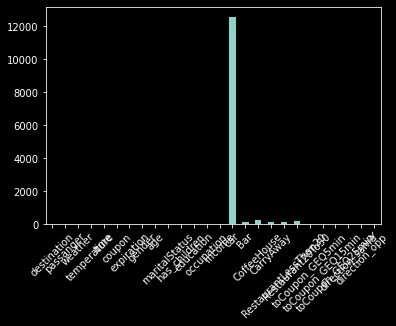

In [6]:

data.isna().sum().plot.bar(x='index', y='n', rot=45)

3. Decide what to do about your missing data -- drop, replace, other...

In [7]:
#From above, it doesnt seem that we can drop NA for car column. So we should just dont do much analysis on "car" column
#We should fix the other columns by dropping the  NA cells
data.dropna(subset=['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20','Restaurant20To50'], inplace=True)
len(data)


12079

4. What proportion of the total observations chose to accept the coupon? 



In [8]:
# Query using query() function
data.head()
percent=100*data.query('Y == 1').count()[0]/data.query('Y == 0 or Y==1').count()[0]
print(percent)

56.93352098683666


In [9]:
#List of columns in the data
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

5. Use a bar plot to visualize the `coupon` column.

<BarContainer object of 5 artists>

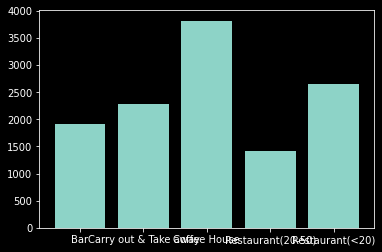

In [10]:
#Use groupby function to extract coupon data
coupondata=data.groupby("coupon").size()
plt.bar(x=coupondata.index,height=coupondata)


[Text(0, 0.5, 'Coupon'), Text(0.5, 0, 'Number of Coupons')]

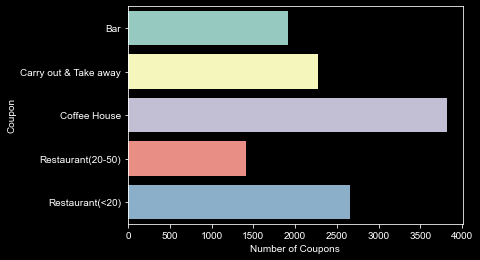

In [11]:
from flask_pymongo import ASCENDING


coupondata=data.groupby("coupon").size()

df=pd.DataFrame(coupondata)
df.iloc[:,0]
ax=sns.barplot(data=df,y=df.index,x=df.iloc[:,0])
sns.set_style("dark")
ax.set(ylabel='Coupon', xlabel='Number of Coupons')

6. Use a histogram to visualize the temperature column.

In [12]:
tempdata=data.groupby("temperature").size()
df=pd.DataFrame(tempdata)
df.iloc[:,0]
tempdata.index.values

array([30, 55, 80], dtype=int64)

[Text(0, 0.5, 'Temperature'), Text(0.5, 0, 'Number of Samples')]

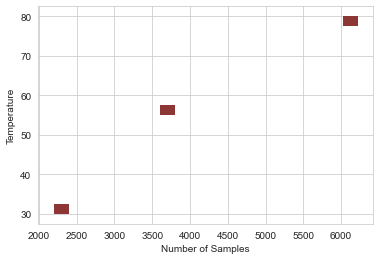

In [13]:
sns.set_style("whitegrid")
ax=sns.histplot(data=df,y=df.index,x=df.iloc[:,0], bins=20, element="poly",kde=True, color = 'red')
ax.set(ylabel='Temperature', xlabel='Number of Samples')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [14]:

data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [15]:
newdf=data.query('coupon== "Bar"')
newdf["age"].unique()
newdf["income"].unique()


array(['$62500 - $74999', '$12500 - $24999', '$75000 - $87499',
       '$50000 - $62499', '$37500 - $49999', '$25000 - $37499',
       '$100000 or More', '$87500 - $99999', 'Less than $12500'],
      dtype=object)

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Passenger'),
 Text(0.5, 1.0, 'passenger in car for bar coupons')]

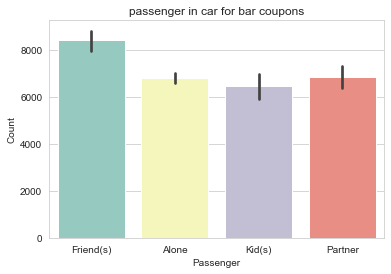

In [16]:
newdf1=pd.DataFrame(newdf["passanger"])
newdf1.iloc[:,0]
ax=sns.barplot(data=newdf1,y=newdf1.index,x=newdf1.iloc[:,0])
sns.set_style("dark")
ax.set(ylabel='Count', xlabel='Passenger', title="passenger in car for bar coupons")


In [17]:
newdf["has_children"].max()
newdf.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [18]:

list=["Kid(s)"]
a=newdf.query('passanger in @list & Y ==1').count()[0]/newdf.query('passanger in @list').count()[0]
b=newdf.query('Bar not in @list & Y ==1').count()[0]/newdf.query('Bar not in @list').count()[0]
print(f"{100*a}% of drivers with kids as passenger did accept the bar coupon")
print(f"{100*b}% of drivers with no kids as passenger did accept the bar coupon")

20.618556701030926% of drivers with kids as passenger did accept the bar coupon
41.19184526921067% of drivers with no kids as passenger did accept the bar coupon


In [19]:
list=["Friend(s)"]
a=newdf.query('passanger in @list & Y ==1').count()[0]/newdf.query('passanger in @list').count()[0]
b=newdf.query('Bar not in @list & Y ==1').count()[0]/newdf.query('Bar not in @list').count()[0]
print(f"{100*a}% of drivers with friends as passenger did accept the bar coupon")
print(f"{100*b}% of drivers with no friends as passenger did accept the bar coupon")

56.60377358490566% of drivers with friends as passenger did accept the bar coupon
41.19184526921067% of drivers with no friends as passenger did accept the bar coupon


In [20]:
newdf.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,1913.000000,1913.000000,1913.0,1913.000000,1913.000000,1913.000000,1913.000000,1913.000000
mean,57.613696,0.427601,1.0,0.662311,0.253528,0.210141,0.789859,0.411918
std,17.889882,0.494860,0.0,0.473046,0.435145,0.407515,0.407515,0.492309
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,0.000000
75%,80.000000,1.000000,1.0,1.000000,1.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


2. What proportion of bar coupons were accepted?


In [21]:
percent=newdf.query('Y == 1').count()[0]/newdf.query('Y == 0 or Y==1').count()[0]
print(f"{100*percent}% of bar coupons were accepted")

41.19184526921067% of bar coupons were accepted


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [22]:

list=["never", 'less1', '1~3']
a=newdf.query(' Bar in @list & Y ==1').count()[0]/newdf.query('Bar in @list').count()[0]
b=newdf.query('Bar not in @list & Y ==1').count()[0]/newdf.query('Bar not in @list').count()[0]

print(f"There was {100*(b-a)/b}% more chance of bar coupon getting accepted for those who went to bar more than 3 times than those who went 3 or less")

There was 51.070637557348526% more chance of bar coupon getting accepted for those who went to bar more than 3 times than those who went 3 or less


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [23]:
newdf["Bar"].unique()
list =["never", "less1"]
list_age=newdf["age"].unique()

list1=['46','26', '31' ,'41' ,'50plus' ,'36']
a=newdf.query('Bar not in @list & age in @list1 & Y ==1').count()[0]/newdf.query('Bar not in @list & age in @list1 ').count()[0]
b=newdf.query('Bar in @list | age not in @list1 & Y ==1').count()[0]/newdf.query('Bar  in @list | age not in @list1 ').count()[0]
# newdf.query('Bar not in @list & age in @list1 ')["Bar"]
print(f"a={a}, b={b}")


a=0.6898263027295285, b=0.9635761589403974


There are ~28% less likelhood for folks > 25 and going to bar >= 1 per month to get the coupon than those less than 25 or  go < once per month and got  a coupon

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [24]:
list = ["never", "less1"]
list1=["farming", "fishing", "forestry"]
a=newdf.query('Bar not in @list & passanger != "kid" & occupation not in @list1 & Y == 1')["Y"].count()/newdf.query('Bar not in @list & passanger != "kid" & occupation not in @list1')["Y"].count()
b=newdf.query('(Bar in @list | passanger == "kid" | occupation in @list1) & Y == 1')["Y"].count()/newdf.query('Bar in @list | passanger == "kid" | occupation in @list1')["Y"].count()
#newdf.query('Bar not in @list' and 'passenger != kid'  and 'occupation not in @list1').count()[0]
#newdf.query('Bar not in @list' and 'passenger != kid' and 'Y ==1' and 'occupation not in @list1').count()[0]/newdf.query('Bar not in @list' and 'passenger != kid'  and 'occupation not in @list1').count()[0]
print(f"a={a}, b={b}")

a=0.6853146853146853, b=0.2953020134228188


There is ~39% more change of those who go > 1 to bar per month and have no kid and not farmer, fisherman or forestryto get a bar coupon
than others

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [25]:
newdf["maritalStatus"].unique()
list=newdf["age"].unique()

list = ["never", "less1"]
ageAllList=['21', '46', '26', '31', '41', '50plus', '36', 'below21']
ageList=['21', '26', 'below21']

listVisits=['4~8', 'gt8']
listIncomeAll=['$37500 - $49999', '$62500 - $74999', '$12500 - $24999', '$75000 - $87499', '$50000 - $62499', '$25000 - $37499','$100000 or More', '$87500 - $99999', 'Less than $12500']
listIncome=['$37500 - $49999','$12500 - $24999', '$25000 - $37499', 'Less than $12500']
a=newdf.query('Bar not in @list & passanger != "kid" & maritalStatus != "Widowed" & Y == 1')["Y"].count()/newdf.query('Bar not in @list & passanger != "kid" & maritalStatus != "Widowed"')["Y"].count()
b=newdf.query('Bar not in @list &  age in @ageList & Y == 1')["Y"].count()/newdf.query('Bar not in @list & age in @ageList')["Y"].count()
c=newdf.query('RestaurantLessThan20 in @listVisits &  income in @listIncome & Y == 1')["Y"].count()/newdf.query('RestaurantLessThan20 in @listVisits &  income in @listIncome ')["Y"].count()
print(f"a={a}, b={b}, c={c}")


a=0.6853146853146853, b=0.7195121951219512, c=0.45645645645645644


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Drivers who went more often to bar and had no kids and were > 25 years . There is also a correlation where drivers going t cheap restaurants and having less income were less prone to get coupon.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

WE WILL STUDY THE CARRY OUT OR TAKE AWAY option

In [26]:
data["coupon"].unique()
carryoutdf=data.query('coupon== "Carry out & Take away"')


In [27]:
carryoutdf.query('Y == 1').count()[0]/carryoutdf.query('Y == 0 or Y==1').count()[0]

0.737719298245614

THIS IMPLIES 73% of participants who got the carry out coupon retrived the coupon. 

In [28]:
carryoutdf.columns


Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [29]:
carryoutdf["time"].unique()

array(['10AM', '2PM', '7AM', '10PM', '6PM'], dtype=object)

In [30]:
newdf1=pd.DataFrame(carryoutdf["passanger"])
newdf1.iloc[:,0]
newdf1

,passanger
25,Friend(s)
33,Friend(s)
41,Alone
47,Friend(s)
55,Friend(s)
...,...
12665,Friend(s)
12672,Alone
12673,Alone
12679,Partner


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Passenger'),
 Text(0.5, 1.0, 'passenger in car for carry out coupons')]

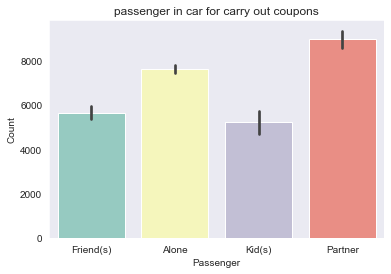

In [31]:

ax=sns.barplot(data=newdf1,y=carryoutdf.index,x=newdf1.iloc[:,0])
sns.set_style("dark")
ax.set(ylabel='Count', xlabel='Passenger', title="passenger in car for carry out coupons")

In [32]:

list=["never", 'less1', '1~3']
a=carryoutdf.query('CarryAway in @list & Y ==1').count()[0]/carryoutdf.query('CarryAway in @list').count()[0]

print(a)
b=carryoutdf.query('CarryAway not in @list & Y ==1').count()[0]/carryoutdf.query('CarryAway not in @list').count()[0]
print(b)
print(f"There was {100*(b-a)}% more chance of carryout coupon getting accepted for those who went for carry out more  than 3 times than those who went less than thrice")

0.723563696919234
0.7534754402224282
There was 2.991174330319424% more chance of carryout coupon getting accepted for those who went for carry out more  than 3 times than those who went less than thrice


The above is a contrast to what we saw with the bar coupons. Here it seems frequency of carry out doesnt impact someone to get the coupon. Also the age of driver didnt make a huge difference in coupon effectiveness.

In [33]:
carryoutdf["CarryAway"].unique()
list =["never", "less1"]
list_age=carryoutdf["age"].unique()
print(list_age)

['21' '46' '26' '31' '41' '50plus' '36' 'below21']


In [34]:

list1=['below21']
a=carryoutdf.query('age in @list1 & Y ==1').count()[0]/carryoutdf.query('age in @list1 ').count()[0]
b=carryoutdf.query('age not in @list1 & Y ==1').count()[0]/carryoutdf.query('age not in @list1 ').count()[0]
# newdf.query('Bar not in @list & age in @list1 ')["Bar"]

print(f"There was {100*(b-a)}% more chance of carryout coupon getting accepted by someone less than 21 than that more than 21")

There was 1.7357183257918574% more chance of carryout coupon getting accepted by someone less than 21 than that more than 21


In [35]:
list1=['10PM', '6PM']
a=carryoutdf.query('time in @list1 & Y ==1').count()[0]/carryoutdf.query('time in @list1 ').count()[0]



In [36]:

b=carryoutdf.query('time not in @list1 & Y ==1').count()[0]/carryoutdf.query('time not in @list1 ').count()[0]
# newdf.query('Bar not in @list & age in @list1 ')["Bar"]
print(f"a={a}, b={b}")
print(f"There was {100*(a-b)}% more chance of carryout coupon getting accepted by someone after 6PM than before 6PM")

a=0.7934272300469484, b=0.7044817927170869
There was 8.894543732986149% more chance of carryout coupon getting accepted by someone after 6PM than before 6PM


In [37]:
list = ["never", "less1"]
list1=["farming", "fishing", "forestry"]

a=carryoutdf.query('CarryAway not in @list & passanger != "kid" & occupation not in @list1 & Y == 1')["Y"].count()/carryoutdf.query('CarryAway not in @list & passanger != "kid" & occupation not in @list1')["Y"].count()
b=carryoutdf.query('(CarryAway in @list | passanger == "kid" | occupation in @list1) & Y == 1')["Y"].count()/carryoutdf.query('CarryAway in @list | passanger == "kid" | occupation in @list1')["Y"].count()
#newdf.query('Bar not in @list' and 'passenger != kid'  and 'occupation not in @list1').count()[0]
#newdf.query('Bar not in @list' and 'passenger != kid' and 'Y ==1' and 'occupation not in @list1').count()[0]/newdf.query('Bar not in @list' and 'passenger != kid'  and 'occupation not in @list1').count()[0]
print(f"a={a}, b={b}")

a=0.7475117862755369, b=0.6873315363881402


In [38]:
#carryoutdf.query('passanger == "kid"' )["Y"].count()

In [39]:
print(carryoutdf["maritalStatus"].unique())
list=carryoutdf["age"].unique()

list = ["never", "less1"]
ageAllList=['21', '46', '26', '31', '41', '50plus', '36', 'below21']
ageList=['21', '26', 'below21']
maritalListAll=['Unmarried partner', 'Single', 'Married partner' ,'Divorced' ,'Widowed']
maritalList=['Single']

incomeListAll=['$37500 - $49999', '$62500 - $74999', '$12500 - $24999', '$75000 - $87499', '$50000 - $62499', '$25000 - $37499','$100000 or More', '$87500 - $99999', 'Less than $12500']
incomeList=[ 'Less than $12500']
a=carryoutdf.query('income  in @incomeList  & maritalStatus in @maritalList & Y == 1')["Y"].count()/carryoutdf.query('income  in @incomeList  & maritalStatus in @maritalList')["Y"].count()
b=carryoutdf.query('CarryAway in @list  &  income in @incomeList  & Y == 1')["Y"].count()/carryoutdf.query('CarryAway in @list  &  income  in @incomeList ')["Y"].count()

print(a,b)

['Single' 'Married partner' 'Unmarried partner' 'Divorced' 'Widowed']
0.7687074829931972 0.7608695652173914


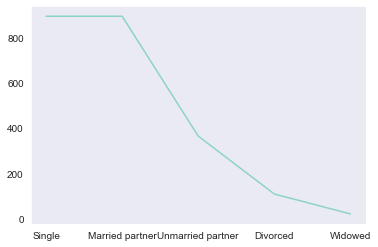

In [40]:
plt.plot(carryoutdf["maritalStatus"].value_counts())

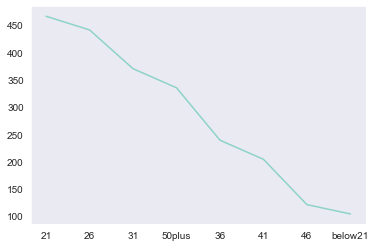

In [41]:
plt.plot(carryoutdf["age"].value_counts())

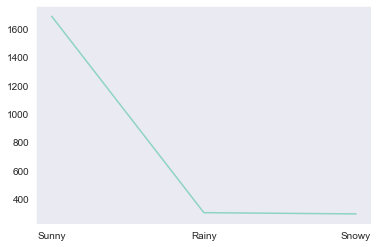

In [42]:
plt.plot(carryoutdf["weather"].value_counts())

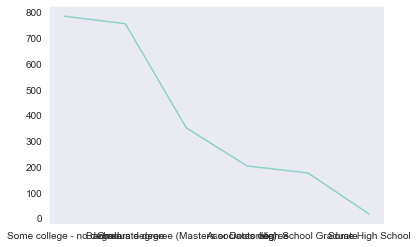

In [43]:
plt.plot(carryoutdf["education"].value_counts())

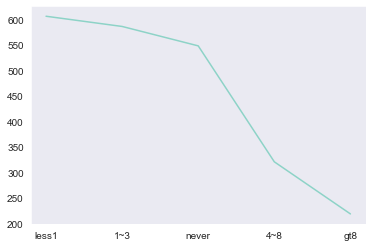

In [44]:
plt.plot(carryoutdf["CoffeeHouse"].value_counts())

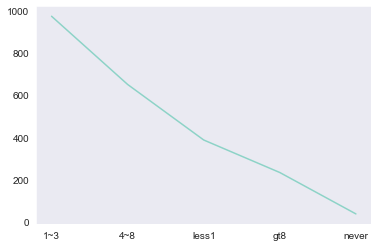

In [45]:
plt.plot(carryoutdf["RestaurantLessThan20"].value_counts())

array(['less1', 'never', '1~3', 'gt8', '4~8'], dtype=object)

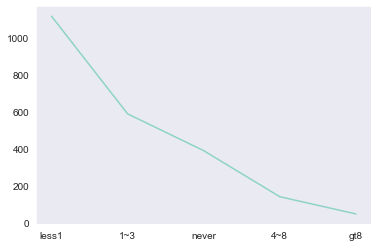

In [46]:
plt.plot(carryoutdf["Restaurant20To50"].value_counts())
carryoutdf["Restaurant20To50"].unique()

In [47]:
carryoutdf.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [48]:
carryoutdf["car"].value_counts()

crossover                                   4
Mazda5                                      4
do not drive                                4
Car that is too old to install Onstar :D    4
Scooter and motorcycle                      3
Name: car, dtype: int64

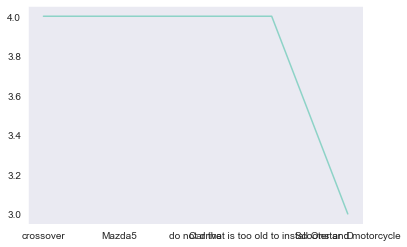

In [49]:
plt.plot(carryoutdf["car"].value_counts())

No need to use car column since there are veryt few data points for car coliumn

In [50]:


print(carryoutdf["car"].unique())

list = ['do not drive','Car that is too old to install Onstar :D', 'Scooter and motorcycle']
visitListAll=['1~3', 'less1', 'never', 'gt8', '4~8', 'nan']
visitList=['gt8', '4~8']
a=carryoutdf.query('RestaurantLessThan20  in @visitList & Y == 1')["Y"].count()/carryoutdf.query('RestaurantLessThan20 in @visitList')["Y"].count()
b=carryoutdf.query('Restaurant20To50 in @visitList & Y == 1')["Y"].count()/carryoutdf.query('Restaurant20To50 in @visitList')["Y"].count()
print(f"a={a}, b={b}")

[nan 'Scooter and motorcycle' 'crossover' 'Mazda5' 'do not drive'
 'Car that is too old to install Onstar :D']
a=0.7485843714609286, b=0.7272727272727273
